###### Supplement Sales Prediction
- Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

- WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

- Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

- Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

- Your task is to predict the store sales for each store in the test set for the next two months.

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### There are 2 datasets provided df_train(train) and test(test) the working on both such dataset have done.

In [126]:
df_train=pd.read_csv("C:\\Users\MyPc\\Downloads\\TRAIN.csv")

df_train.head(20)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,01-01-2018,1,Yes,62,45614.52
5,T1000006,249,S1,L3,R2,01-01-2018,1,Yes,39,34211.22
6,T1000007,248,S1,L1,R2,01-01-2018,1,Yes,40,35352.66
7,T1000008,247,S1,L1,R3,01-01-2018,1,Yes,64,52650.00
8,T1000009,246,S3,L1,R3,01-01-2018,1,Yes,62,42633.78
9,T1000010,254,S4,L1,R1,01-01-2018,1,Yes,87,62572.80


The dataset has a total of 10 columns.

In [127]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


The total dataset contains 10 columns of which 6 are having a dtype of object and there are 3 int64 and 1 float64 column.
the column "Sales" is the target column.

In [128]:
df_train['Holiday'].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [129]:
df_train['#Order'].value_counts()

53     3427
59     3418
56     3367
51     3334
58     3296
       ... 
296       1
316       1
320       1
331       1
273       1
Name: #Order, Length: 299, dtype: int64

In [130]:
df_train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [131]:
df_train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [132]:
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


Of the 4 numerical colulmns- 
- None of them arr having missing values, as the count for all the columns are same.
- There might be skewness present in the columns.
- Holiday even though numerical is having 0 as lowest value and 1 as highest value and meadian 0  which means that it is indeed a categorical column.

#### Exploratory Data Analysis
- Univariate / bi variate / multivariate analysis done
- Feature engineering of the df_train by splitting date column into 'year' ,'month', 'year'.

In [133]:
#now converting to day, month , year using date_time_index 
df_train['year'] = pd.DatetimeIndex(df_train['Date']).year 
df_train['month'] = pd.DatetimeIndex(df_train['Date']).month 
df_train['day'] = pd.DatetimeIndex(df_train['Date']).day

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

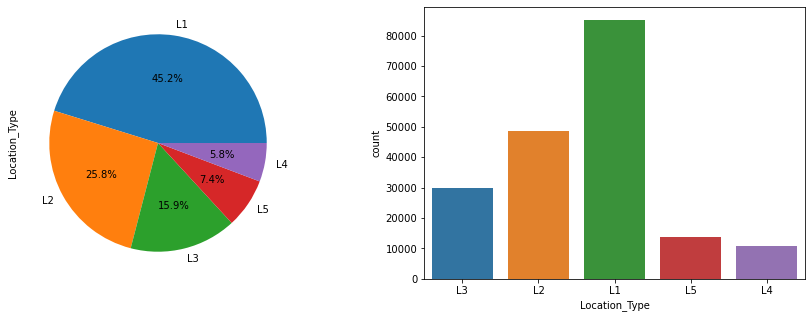

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df_train['Location_Type'])
df_train['Location_Type'].value_counts()

Location_type L1 has the count of 85140 which is the highest in number. 

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

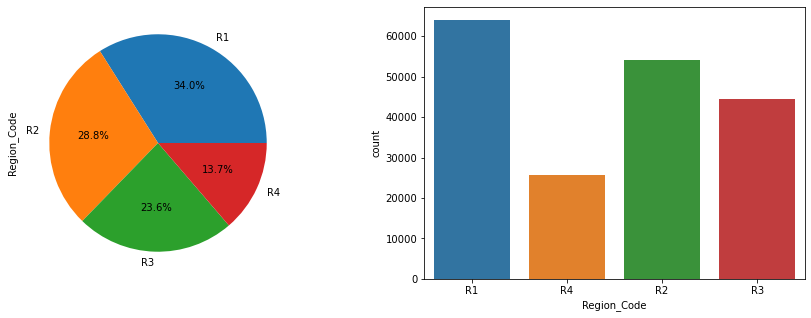

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Region_Code'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df_train['Region_Code'])
df_train['Region_Code'].value_counts()

Region_code R1 has the count of 63984 which is the highest in number.

0    163520
1     24820
Name: Holiday, dtype: int64

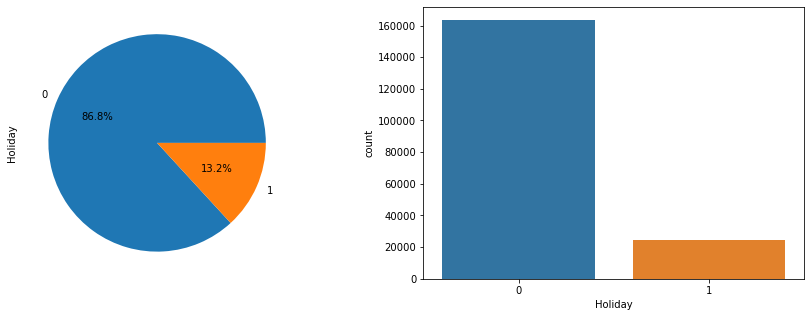

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Holiday'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df_train['Holiday'])
df_train['Holiday'].value_counts()

It can be seen that there is a disparity in the count of the number of holidays. 

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

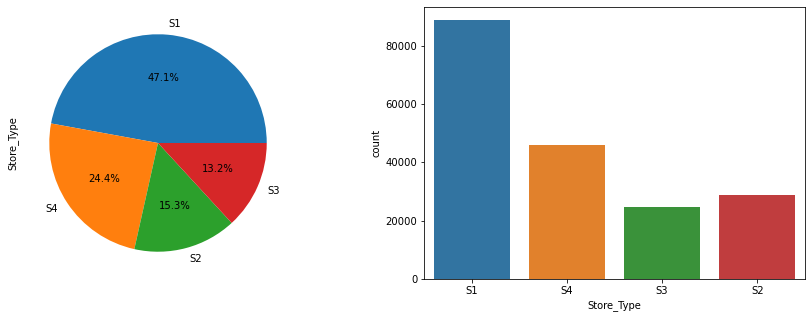

In [137]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Store_Type'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df_train['Store_Type'])
df_train['Store_Type'].value_counts()

Store_type S1 has the count of 88752 which is the highest in number.

No     104051
Yes     84289
Name: Discount, dtype: int64

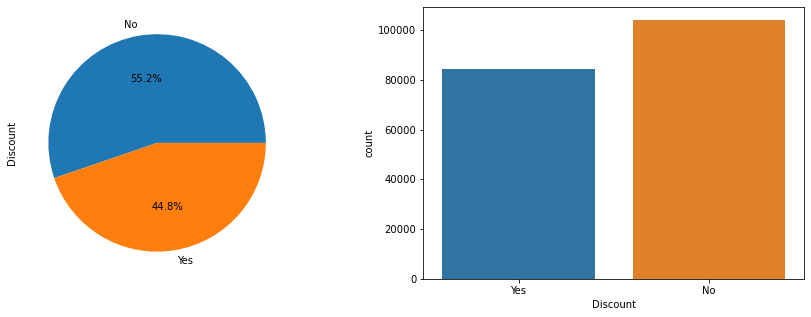

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_train['Discount'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(df_train['Discount'])
df_train['Discount'].value_counts()

It can be seen that the number of times discounts were given is less than the times were not given.

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

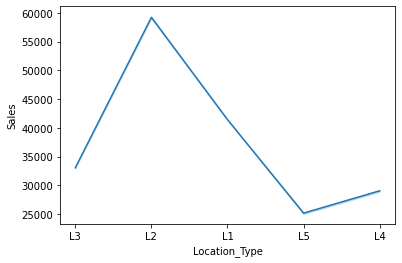

In [139]:
sns.lineplot(x='Location_Type', y='Sales',data= df_train)

- The Location_type L2 shows  higest sales.
- There can be seen a rise in sales from L3 to L2 AND it decreases to L1 and L5 but it has increased to L4.

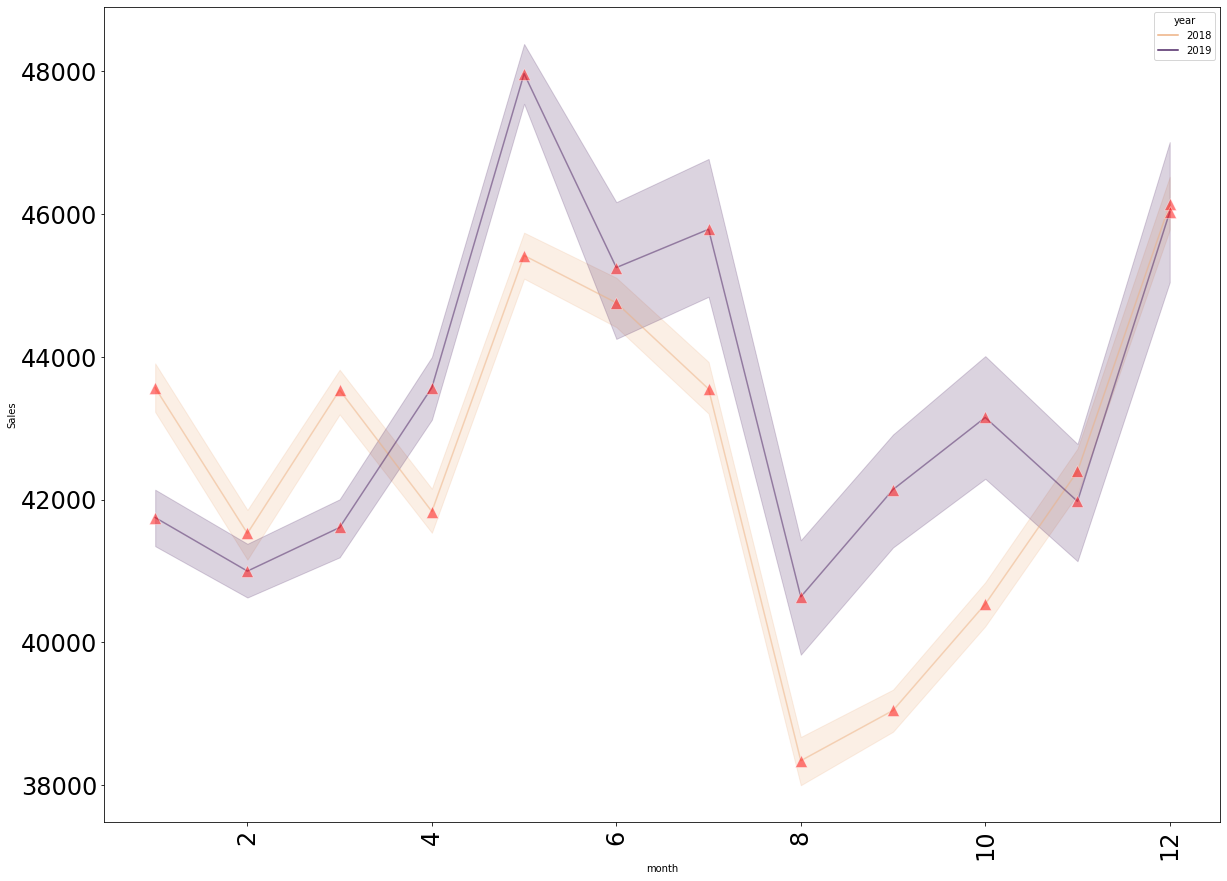

In [140]:
#Multivariate analysis to better understand the date vs sales 
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='Sales',hue='year',data=df_train, palette="flare",marker='^', alpha=0.50,markerfacecolor='red', markersize=12)
plt.xticks(rotation=90)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.show()

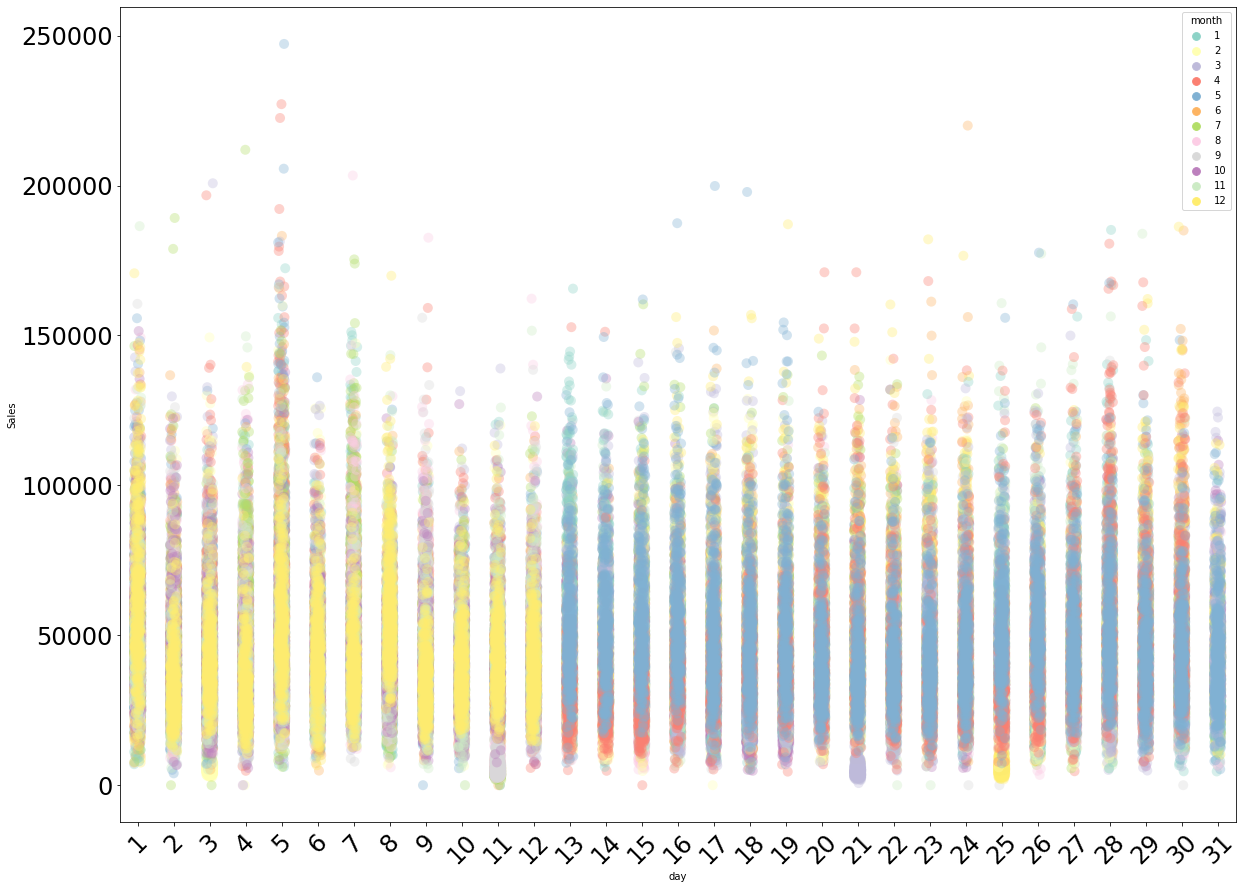

In [141]:
#Multivariate analysis to better understand the date vs sales 
plt.figure(figsize=(20,15))
sns.stripplot(x='day',y='Sales',hue='month',data=df_train,palette="Set3", size=10, marker="o",alpha=.35,edgecolor="black")
plt.xticks(rotation=45)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.show()


the 2 nd of the month has seen the highest sale.

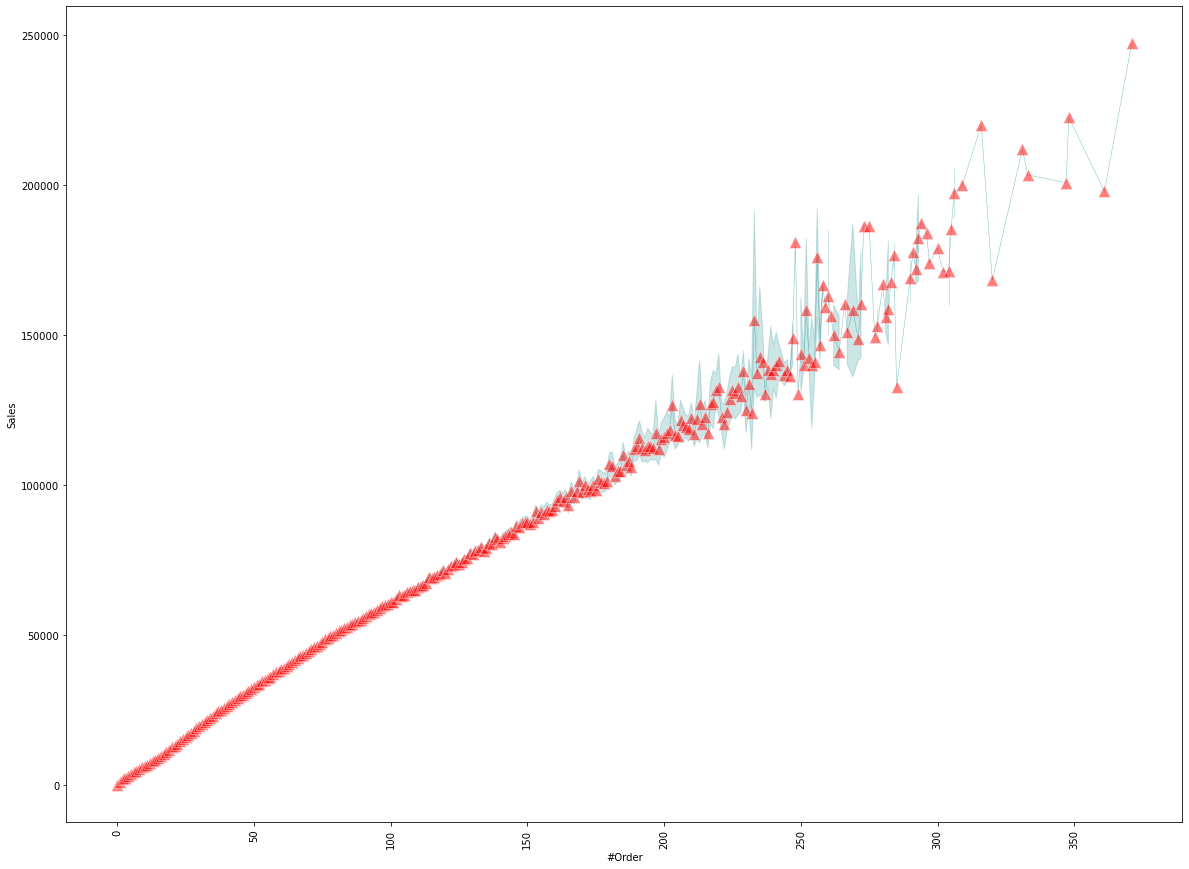

In [142]:
plt.figure(figsize=(20,15))
sns.lineplot(x='#Order', y='Sales',data= df_train, color = 'teal', linewidth=.5,marker='^', alpha=0.50,markerfacecolor='red', markersize=12)
plt.xticks(rotation=90)
plt.show()

It can be seen that the order and sales are having a positive relationso it can be understood that with the increase in order the sales also increase. 

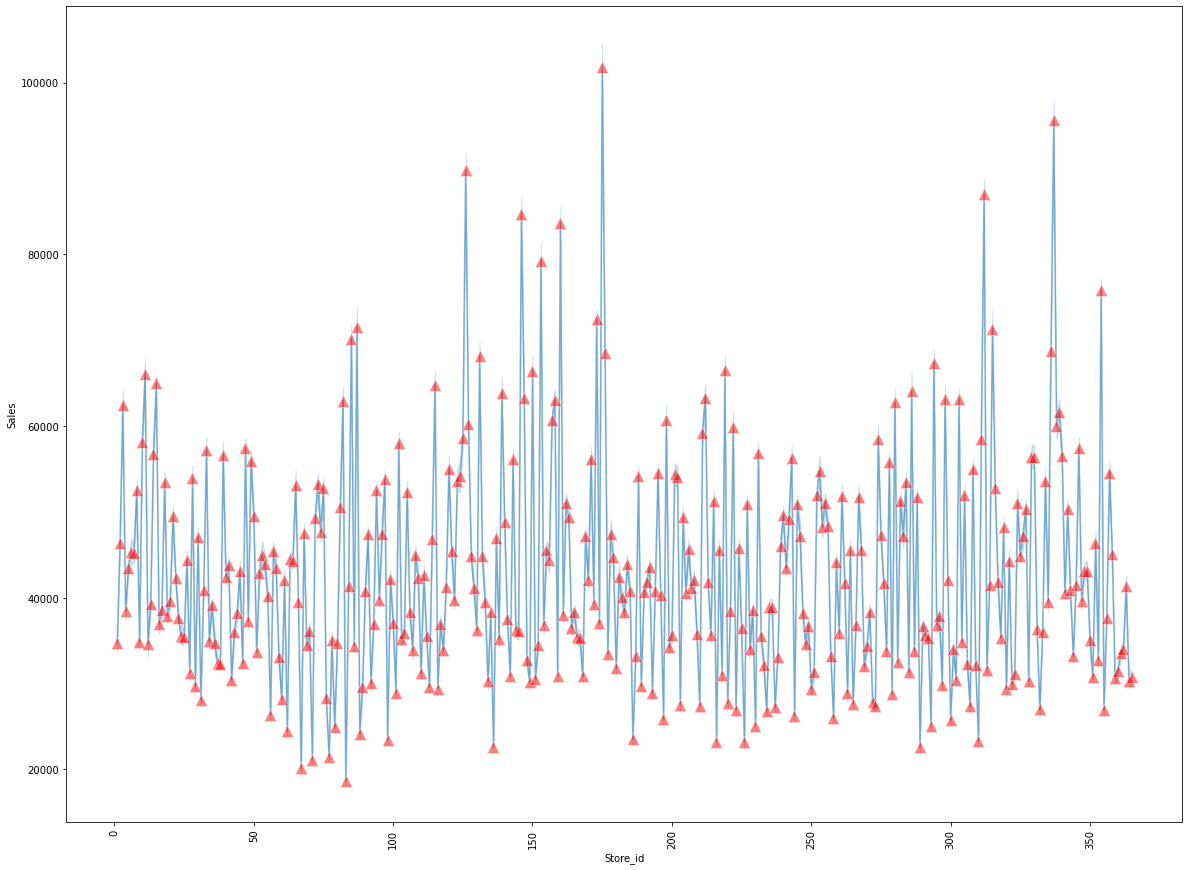

In [143]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Store_id',y='Sales',data=df_train, palette="flare",marker='^', alpha=0.50,markerfacecolor='red', markersize=12)
plt.xticks(rotation=90)
plt.show()

###### Checking coorelation matrix for the understanding the multi colinearity.

In [144]:
df_train.corr()

,Store_id,Holiday,#Order,Sales,year,month,day
Store_id,1.000000e+00,5.380970e-16,0.028290,0.004377,4.924216e-15,4.712256e-16,-3.237165e-16
Holiday,5.380970e-16,1.000000e+00,-0.140496,-0.154779,1.386181e-02,-4.733620e-02,3.586894e-02
#Order,2.828985e-02,-1.404963e-01,1.000000,0.941601,2.285999e-02,-1.031918e-02,-1.431317e-02
Sales,4.376631e-03,-1.547788e-01,0.941601,1.000000,1.828431e-02,-3.338032e-03,-4.261232e-02
year,4.924216e-15,1.386181e-02,0.022860,0.018284,1.000000e+00,-2.794695e-01,-7.358496e-02
month,4.712256e-16,-4.733620e-02,-0.010319,-0.003338,-2.794695e-01,1.000000e+00,-1.132951e-01
day,-3.237165e-16,3.586894e-02,-0.014313,-0.042612,-7.358496e-02,-1.132951e-01,1.000000e+00


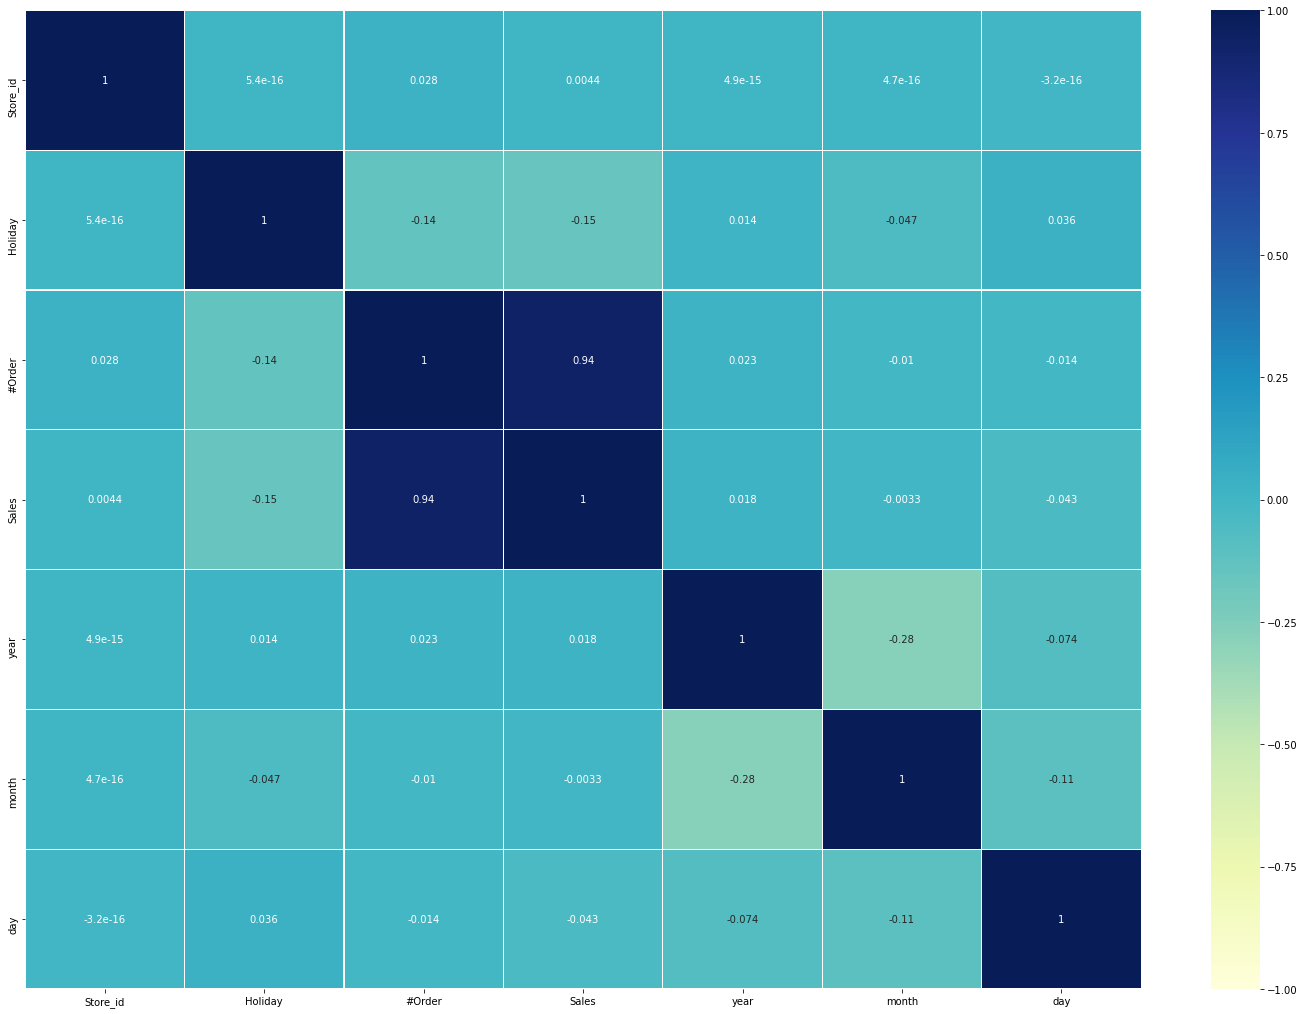

In [145]:
#Better to present the values in a corelation table through a heatmmap.
plt.figure(figsize=(25,18))
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True,vmin=-1, vmax=1,linecolor='white',cbar=True,linewidths=.1,fmt='.2g')
plt.show()

It can be seen that the Multicollinearity are all in tolerable range but VIF has to be checked.

In [146]:
test=pd.read_csv("C:\\Users\MyPc\\Downloads\\TEST_FINAL.csv")

test.head(20)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,01-06-2019,0,No
1,T1188342,172,S1,L1,R1,01-06-2019,0,No
2,T1188343,173,S4,L2,R1,01-06-2019,0,No
3,T1188344,174,S1,L1,R4,01-06-2019,0,No
4,T1188345,170,S1,L1,R2,01-06-2019,0,No
5,T1188346,175,S4,L2,R1,01-06-2019,0,No
6,T1188347,176,S4,L2,R3,01-06-2019,0,No
7,T1188348,169,S1,L2,R4,01-06-2019,0,No
8,T1188349,14,S3,L2,R4,01-06-2019,0,No
9,T1188350,177,S2,L1,R4,01-06-2019,0,No


### Feature Engineering and Data Cleaning.
- It will done for bboth train data and test data.

In [147]:
from sklearn.preprocessing import OrdinalEncoder

In [148]:
enc=OrdinalEncoder()

In [149]:
df_train['Store_Type']=enc.fit_transform(df_train[['Store_Type']])
df_train['Store_Type']

0         0.0
1         3.0
2         2.0
3         1.0
4         1.0
         ... 
188335    1.0
188336    3.0
188337    0.0
188338    2.0
188339    1.0
Name: Store_Type, Length: 188340, dtype: float64

In [150]:
test['Store_Type']=enc.fit_transform(test[['Store_Type']])
test['Store_Type']

0        3.0
1        0.0
2        3.0
3        0.0
4        0.0
        ... 
22260    1.0
22261    3.0
22262    0.0
22263    0.0
22264    1.0
Name: Store_Type, Length: 22265, dtype: float64

In [151]:
df_train['Region_Code']=enc.fit_transform(df_train[['Region_Code']])
df_train['Region_Code']

0         0.0
1         0.0
2         0.0
3         0.0
4         3.0
         ... 
188335    1.0
188336    0.0
188337    1.0
188338    1.0
188339    0.0
Name: Region_Code, Length: 188340, dtype: float64

In [152]:
test['Region_Code']=enc.fit_transform(test[['Region_Code']])
test['Region_Code']

0        2.0
1        0.0
2        0.0
3        3.0
4        1.0
        ... 
22260    1.0
22261    0.0
22262    2.0
22263    3.0
22264    1.0
Name: Region_Code, Length: 22265, dtype: float64

In [153]:
df_train["Location_Type"]=enc.fit_transform(df_train[["Location_Type"]])
df_train["Location_Type"]

0         2.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
188335    2.0
188336    1.0
188337    2.0
188338    0.0
188339    0.0
Name: Location_Type, Length: 188340, dtype: float64

In [154]:
test['Location_Type']=enc.fit_transform(test[['Location_Type']])
test['Location_Type']

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
22260    4.0
22261    1.0
22262    0.0
22263    0.0
22264    0.0
Name: Location_Type, Length: 22265, dtype: float64

In [155]:
df_train['Discount'].replace({"No": 0 ,"Yes": 1}, inplace = True)
df_train['Discount']

0         1
1         1
2         1
3         1
4         1
         ..
188335    1
188336    0
188337    0
188338    1
188339    0
Name: Discount, Length: 188340, dtype: int64

In [156]:
test['Discount'].replace({"No": 0 ,"Yes": 1}, inplace = True)
test['Discount']

0        0
1        0
2        0
3        0
4        0
        ..
22260    0
22261    0
22262    1
22263    0
22264    0
Name: Discount, Length: 22265, dtype: int64

In [157]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,3.0,1.0,2.0,01-06-2019,0,0
1,T1188342,172,0.0,0.0,0.0,01-06-2019,0,0
2,T1188343,173,3.0,1.0,0.0,01-06-2019,0,0
3,T1188344,174,0.0,0.0,3.0,01-06-2019,0,0
4,T1188345,170,0.0,0.0,1.0,01-06-2019,0,0


In [158]:
#now converting to day, month , year using date_time_index 
test['year'] = pd.DatetimeIndex(test['Date']).year 
test['month'] = pd.DatetimeIndex(test['Date']).month 
test['day'] = pd.DatetimeIndex(test['Date']).day

In [159]:
#Since the "year" column contains '2018' and '2019' , therefore it can easily be converted to 1 and 2.
df_train['year'].replace(2018,1,inplace=True)
df_train['year'].replace(2019,2,inplace=True)

In [160]:
#Since the "year" column contains '2018' and '2019' , therefore it can easily be converted to 1 and 2.
test['year'].replace(2018,1,inplace=True)
test['year'].replace(2019,2,inplace=True)

In [161]:
df_train['Days']=(df_train['year']*365)+(df_train['month']*30)+(df_train['day'])

In [162]:
test['Days']=(test['year']*365)+(test['month']*30)+(test['day'])

In [163]:
test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,year,month,day,Days
0,T1188341,171,3.0,1.0,2.0,01-06-2019,0,0,2,1,6,766
1,T1188342,172,0.0,0.0,0.0,01-06-2019,0,0,2,1,6,766
2,T1188343,173,3.0,1.0,0.0,01-06-2019,0,0,2,1,6,766
3,T1188344,174,0.0,0.0,3.0,01-06-2019,0,0,2,1,6,766
4,T1188345,170,0.0,0.0,1.0,01-06-2019,0,0,2,1,6,766
...,...,...,...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,1.0,4.0,1.0,31-07-2019,0,0,2,7,31,971
22261,T1210602,11,3.0,1.0,0.0,31-07-2019,0,0,2,7,31,971
22262,T1210603,185,0.0,0.0,2.0,31-07-2019,0,1,2,7,31,971
22263,T1210604,69,0.0,0.0,3.0,31-07-2019,0,0,2,7,31,971


In [164]:
test.drop(['ID','Store_id','Date','year','month','day'],axis=1, inplace=True)
test.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Days
0,3.0,1.0,2.0,0,0,766
1,0.0,0.0,0.0,0,0,766
2,3.0,1.0,0.0,0,0,766
3,0.0,0.0,3.0,0,0,766
4,0.0,0.0,1.0,0,0,766


In [165]:
test.skew()

Store_Type       0.472406
Location_Type    1.065187
Region_Code      0.374863
Holiday          5.247629
Discount         0.297996
Days            -0.398009
dtype: float64

In [166]:
#treating the  skewness 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=True)
test=pt.fit_transform(test)

In [167]:
df_train.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day,Days
0,T1000001,1,0.0,2.0,0.0,01-01-2018,1,1,9,7011.84,1,1,1,396
1,T1000002,253,3.0,1.0,0.0,01-01-2018,1,1,60,51789.12,1,1,1,396
2,T1000003,252,2.0,1.0,0.0,01-01-2018,1,1,42,36868.20,1,1,1,396
3,T1000004,251,1.0,2.0,0.0,01-01-2018,1,1,23,19715.16,1,1,1,396
4,T1000005,250,1.0,2.0,3.0,01-01-2018,1,1,62,45614.52,1,1,1,396
5,T1000006,249,0.0,2.0,1.0,01-01-2018,1,1,39,34211.22,1,1,1,396
6,T1000007,248,0.0,0.0,1.0,01-01-2018,1,1,40,35352.66,1,1,1,396
7,T1000008,247,0.0,0.0,2.0,01-01-2018,1,1,64,52650.00,1,1,1,396
8,T1000009,246,2.0,0.0,2.0,01-01-2018,1,1,62,42633.78,1,1,1,396
9,T1000010,254,3.0,0.0,0.0,01-01-2018,1,1,87,62572.80,1,1,1,396


In [168]:
##the columns will not be required so it will be droped.
df_train.drop(['ID','Store_id','Date','year','month','day','#Order'],axis=1, inplace=True)
df_train.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Days
0,0.0,2.0,0.0,1,1,7011.84,396
1,3.0,1.0,0.0,1,1,51789.12,396
2,2.0,1.0,0.0,1,1,36868.20,396
3,1.0,2.0,0.0,1,1,19715.16,396
4,1.0,2.0,3.0,1,1,45614.52,396


In [169]:
df_train.skew()

Store_Type       0.472378
Location_Type    1.065123
Region_Code      0.374840
Holiday          2.177176
Discount         0.211021
Sales            1.248819
Days             0.376216
dtype: float64

The skewness is not high but it is positively skewed.

In [170]:
from scipy.stats import zscore #Eliminating the skewness in the dataset.
z_score = zscore(df_train[['Location_Type','Holiday','Sales']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3.5).all(axis=1)

df=df_train[filtering_entry]
df.describe()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Days
count,186992.000000,186992.000000,186992.000000,186992.000000,186992.000000,186992.000000,186992.000000
mean,1.135316,1.044489,1.174323,0.132198,0.445185,42197.026220,663.895691
std,1.242438,1.231009,1.045797,0.338707,0.496988,17109.441616,168.205981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,30353.250000,524.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,39531.000000,650.000000
75%,2.000000,2.000000,2.000000,0.000000,1.000000,51546.000000,789.000000
max,3.000000,4.000000,3.000000,1.000000,1.000000,107361.000000,1095.000000


In [171]:
#Divivding the datset into x and y 
y= df['Sales']
x= df.drop(['Sales'],axis = 1)

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.077315,Store_Type
1,1.020580,Location_Type
2,1.071930,Region_Code
3,1.000586,Holiday
4,1.005880,Discount
5,1.005591,Days


In [174]:
# Hold Out Method: ( prediction of Sales ) :
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

In [176]:
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error

In [177]:
#Model Training:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
#Model Prediction with trained data:
y_dtc_pred = dtc.predict(x_train)
# Predicting test data with model:
y_test_dtc_pred = dtc.predict(x_test)
print("R Square Score of Decision Tree Regressor:" ,r2_score(y_train,y_dtc_pred))
print('MSLE:{}'.format(mean_squared_log_error(y_test,y_test_dtc_pred)))

R Square Score of Decision Tree Regressor: 0.8069392471185852
MSLE:0.06364712887330302


In [178]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)
print("R Square Score of Random Forest Regressor:" ,r2_score(y_train,y_rf_pred))
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)
print('MSLE:{}'.format(mean_squared_log_error(y_test,y_test_rf_pred)))

R Square Score of Random Forest Regressor: 0.8031915234418707
MSLE:0.059782070608041166


In [179]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)
print("R Square Score ofGradient Boosting Regressor:" ,r2_score(y_train,y_gbr_pred))
print('MSLE:{}'.format(mean_squared_log_error(y_test,y_test_gbr_pred)))

R Square Score ofGradient Boosting Regressor: 0.6334529710303534
MSLE:0.09364827463645485


In [180]:
#setting the test value as x_test
x_test=test

###### As random forest has the lowest MSLE value of  0.059782 it will be used for predicting with the test file.

In [181]:
# Doing the prediction using the test dataset
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
score=rf.score(x_train,y_train)
print(rf,':',score)

RandomForestRegressor() : 0.8032087274655815


In [ ]:
### Uploading to the final submission csv file.
submission = pd.read_csv("C:\\Users\MyPc\\Downloads\\SAMPLE.csv")
final_predictions =pd.DataFrame(dtc_pred)
datasets=pd.concat([submission['ID'],final_predictions],axis=1)
#only positive predictions for the target variable
datasets.columns=['ID','Sales']
datasets.to_csv("C:\\Users\MyPc\\Downloads\\SAMPLE.csv",index=False)